**IA@ICA by Professor J. Morlier**

From the famous example of 
Ebden, M. (2008). Gaussian processes for regression: A quick introduction. The website of robotics research group in department on engineering science, University of Oxford, 91, 424-436.

**EXERCICE 1:** Given some noisy observations of a dependent variable at certain values of the independent variable , what is our best estimate of the dependent variable at a new value x* 

Text(0, 0.5, 'y')

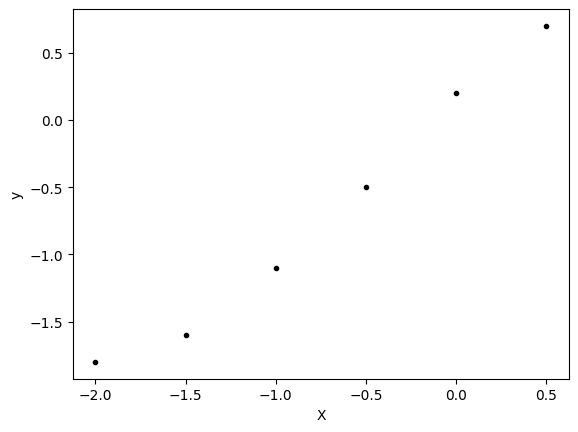

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Inputs
X = np.array([-2.0, -1.5, -1, -0.5, 0, 0.5]).reshape(-1, 1)
n = X.shape[0]

# Outputs
y = np.array([-1.8, -1.6, -1.1, -0.5, 0.2, 0.7]).reshape(-1, 1)

# Plotting data
plt.figure()
plt.plot(X, y, 'k.')
plt.xlabel('X')
plt.ylabel('y')



What if we want to estimate the model at a new point  x* defined as 18 points in [-1.5,0]. Please check also x*= 0.2 (extrapolation) !!
The regression problem is defined as follows:
Let $\mathbf{x}_i \in {R}^{6}$ be an input vector and $\mathbf{y}_i \in {R}^{6}$ be its corresponding target. The set of $M$ inputs are arranged into a matrix $\mathbf{X} = [\mathbf{x}_1, \dots, \mathbf{x}_M]^\top$ and their corresponding targets are stored in a matrix $\mathbf{Y} = [\mathbf{y}_1 - \mathbf{\bar{y}}, \dots, \mathbf{y}_M-\mathbf{\bar{y}}]^\top$, with $\mathbf{\bar{y}}$  being the mean target value in $\mathbf{Y}$.

In [2]:
# Interpolation and extrapolation points
# xstar > 0.5 # Extrapolation
xstar = np.arange(-2.0, 1.01, 0.1).reshape(-1, 1)  # Adjust the range and step for better visualization
N = xstar.shape[0]

# Computing covariance natrix block structure (before Kernel) 
covXXInd1, covXXInd2 = np.meshgrid(X, X)
covXXsInd1, covXXsInd2 = np.meshgrid(X, xstar)
covXsXsInd1, covXsXsInd2 = np.meshgrid(xstar, xstar)

hey hey add something missing, we may need parameters to fit "a model" of our covariance matrix. Let's try with a Standard Exponential (SE) Kernel $k(x,x') =\sigma_f^2\exp\left(-\frac{(x-x')^2}{l^ 2}\right)$


In [3]:
# Judicious Hyperparameters for the Kernel Function
l = 1 # Lengthscale
sig_f = np.sqrt(3) # Signal variance

# Computing covariance matrices through SE Kernel
#TO DO: Compute the covariance matrices
# Computing covariance matrices
covXX   = (sig_f**2) * np.exp(-(covXXInd1 - covXXInd2) ** 2 / l ** 2)
covXsXs = (sig_f**2) * np.exp(-(covXsXsInd1 - covXsXsInd2) ** 2 / l ** 2)
covXXs  = (sig_f**2) * np.exp(-(covXXsInd1 - covXXsInd2) ** 2 / l ** 2)

I wish to train a GPR model $\mathcal{G} = \lbrace \mathbf{X}, \mathbf{Y}, \theta \rbrace$ using the squared exponential function ( $\theta$ must be chosen):
$k(\mathbf{x}_i, \mathbf{x}_j) = \sigma_f^2 \text{exp} \left( - \frac{1}{l^2}(\mathbf{x}_i - \mathbf{x}_j)^2\right) + \sigma_n^2\delta_{ij}$
, where $\delta_{ij}$ equals 1 if $i = j$ and 0 otherwise. 

In [4]:
# Adding noise to covariance matrix, let's try less?
sig_n = 0.8
covXX_noisy = covXX + sig_n ** 2 * np.eye(n)

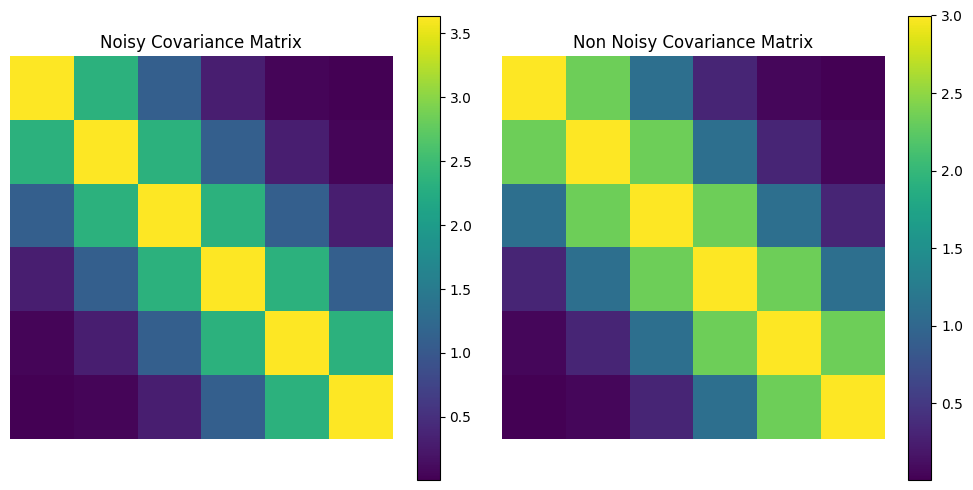

In [5]:
# Plotting covariance matrix with and without noise
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first image on the left subplot
im0 = axes[0].imshow(covXX_noisy, cmap='viridis')  # You can choose a colormap that suits your data
axes[0].set_title('Noisy Covariance Matrix')
axes[0].set_axis_off()  # Optional: Turn off axis labels and ticks

# Plot the second image on the right subplot
im1 = axes[1].imshow(covXX, cmap='viridis')  # You can choose a colormap that suits your data
axes[1].set_title('Non Noisy Covariance Matrix')
axes[1].set_axis_off()  # Optional: Turn off axis labels and ticks

# Display the colorbars if needed
cbar0 = fig.colorbar(im0, ax=axes[0])
cbar1 = fig.colorbar(im1, ax=axes[1])

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Display the plot
plt.show()

In [6]:
# Computing posterior mean and covariance

# Compute posterior mean and covariance
def posterior(covXXs,covXX,covXsXs):
    posterior_mean = covXXs @ np.linalg.inv(covXX) @ y
    posterior_cov = covXsXs - covXXs @ np.linalg.inv(covXX) @ covXXs.T
    return posterior_mean,posterior_cov

In [7]:
# Computing posterior mean and covariance without noise
posterior_mean, posterior_cov  = posterior(covXXs,covXX,covXsXs)

# Computing posterior mean and covariance with noise
posterior_mean_noisy, posterior_cov_noisy  = posterior(covXXs,covXX_noisy,covXsXs)

/tmp/ipykernel_401630/3572505982.py:4: RuntimeWarning: invalid value encountered in sqrt
  upper_bound = posterior_mean.flatten() + 2 * np.sqrt(np.diag(posterior_cov))
/tmp/ipykernel_401630/3572505982.py:5: RuntimeWarning: invalid value encountered in sqrt
  lower_bound = posterior_mean.flatten() - 2 * np.sqrt(np.diag(posterior_cov))


Text(0, 0.5, 'y')

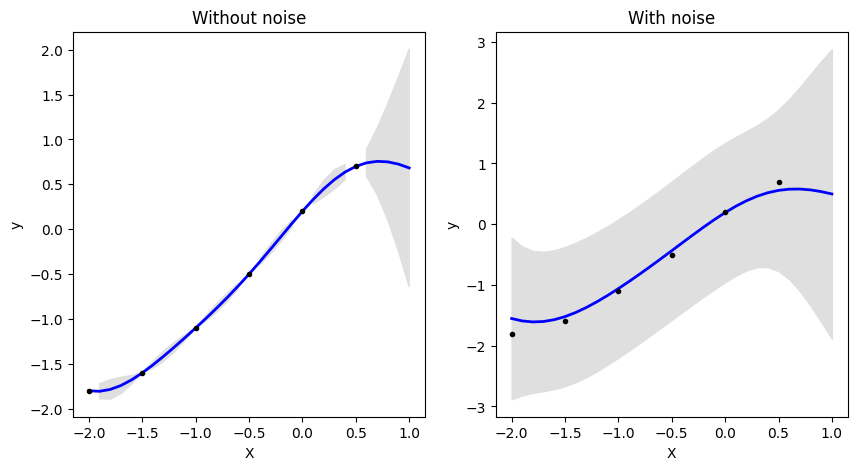

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the mean and variance of the posterior without noise
upper_bound = posterior_mean.flatten() + 2 * np.sqrt(np.diag(posterior_cov))
lower_bound = posterior_mean.flatten() - 2 * np.sqrt(np.diag(posterior_cov))

axes[0].fill_between(xstar.flatten(), upper_bound, lower_bound, color=[7/8, 7/8, 7/8])
axes[0].plot(xstar, posterior_mean, 'b-', linewidth=2)
axes[0].plot(X, y, 'k.')
axes[0].set_title('Without noise')
axes[0].set_xlabel('X')
axes[0].set_ylabel('y')


# Plot the mean and variance of the posterior with noise
upper_bound_noisy = posterior_mean_noisy.flatten() + 2 * np.sqrt(np.diag(posterior_cov_noisy))
lower_bound_noisy = posterior_mean_noisy.flatten() - 2 * np.sqrt(np.diag(posterior_cov_noisy))

axes[1].fill_between(xstar.flatten(), upper_bound_noisy, lower_bound_noisy, color=[7/8, 7/8, 7/8])
axes[1].plot(xstar, posterior_mean_noisy, 'b-', linewidth=2)
axes[1].plot(X, y, 'k.')
axes[1].set_title('With noise')
axes[1].set_xlabel('X')
axes[1].set_ylabel('y')

Text(0, 0.5, 'y')

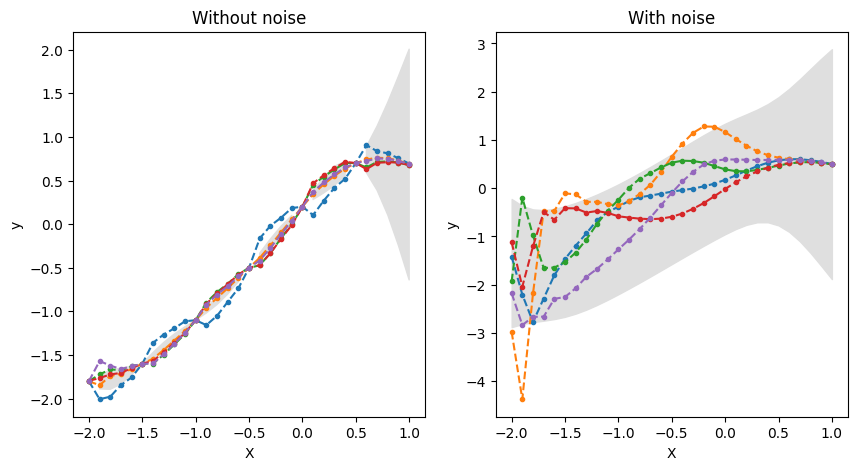

In [9]:
# Generating random function samples from posterior

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

jitter = 10 ** (-6)

# Without noise
L = np.linalg.cholesky(posterior_cov + jitter * np.eye(N))
random_functions = posterior_mean + L.T @ np.random.randn(N, 5)
axes[0].fill_between(xstar.flatten(), upper_bound, lower_bound, color=[7/8, 7/8, 7/8])
axes[0].plot(xstar, random_functions,'.--')
axes[0].set_title('Without noise')
axes[0].set_xlabel('X')
axes[0].set_ylabel('y')


# Wiht noise
L = np.linalg.cholesky(posterior_cov_noisy + jitter * np.eye(N))
random_functions = posterior_mean_noisy + L.T @ np.random.randn(N, 5)

axes[1].fill_between(xstar.flatten(), upper_bound_noisy, lower_bound_noisy, color=[7/8, 7/8, 7/8])
axes[1].plot(xstar, random_functions,'.--')
axes[1].set_title('With noise')
axes[1].set_xlabel('X')
axes[1].set_ylabel('y')

but is there a way to find the $\theta_{optimal}$ ? oh $\theta = [l, \sigma_f, \sigma_n]$ 

The hyperparameters are $\theta = [l, \sigma_f, \sigma_n]$  with $\sigma_n$ being the assumed noise level in the training data and $l$ is the length-scale  (of oscillations) and $\sigma_f$ the amplitude.
To train the model, I need to minimise the negative log marginal likelihood with respect to the hyperparameters:
$-\text{log}\, p(\mathbf{Y} \mid \mathbf{X}, \theta) = \frac{1}{2} \text{tr}(\mathbf{Y}^\top\mathbf{K}^{-1}\mathbf{Y}) + \frac{1}{2}\text{log}\mid\mathbf{K}\mid + \,c,$
where c is a constant and the matrix $\mathbf{K}$ is a function of the hyperparameters (see equation k(xi,xj) = ...).

For this purpose. Let's move to **EXERCICE 2** and use scikit learn and SMT